<div style="background-color:#d4edda;padding: 20px; border-radius: 10px;text-align: center">

#                                                  Sales Analysis
</div>

<div style="background-color: #FAF9F6; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Introduction

In today's competitive market, understanding sales trends and customer behavior is crucial for making informed business decisions. This project involves a comprehensive analysis of sales data from the year 2019. The dataset includes information about each sale, comprising Order ID, Product, Quantity Ordered, Price Each, Order Date, and Purchase Address. By examining this data, we aim to uncover valuable insights that can help improve sales strategies, optimize inventory management, and enhance customer satisfaction.
    
### Objectives

The primary objectives of this sales analysis are:
    
1. Identify Sales Trend: Determine the monthly sales patterns to understand peak sales period.
2. Product Performance: Evaluate which products are the most popular and contribute the most to revenue.     
3. Geographical Analysis: Analyze sales distribution across different cities to identify key markets.
4. Customer Purchase Behavior: Explore common product combinations to enhance cross-selling strategies.
5. Sales Metrics: Calculate essential sales metrics such as total revenue, average order value, and product-specific performance.
    
### Dataset Description
The dataset comprises the following columns:

1. Order ID: Unique identifier for each order.
2. Product: The name of the product sold.
3. Quantity Ordered: Number of units of the product ordered.
4. Price Each: Price of a single unit of the product.
5. Order Date: Date and time when the order was placed.
6. Purchase Address: Address where the product was delivered, including city and state.
</div>

<div style="background-color:#d4edda;padding: 20px; border-radius: 10px;text-align: center">

#                                             Importing Libraries
</div>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import os
from itertools import combinations
from collections import Counter

<div style="background-color:#d4edda;padding: 20px; border-radius: 10px;text-align: center">

#       Merging 12 months of sales data                                  
</div>

In [8]:
# Load all sales data into a single DataFrame
files = [file for file in os.listdir('C:/Users/dm22ach/Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv(f'C:/Users/dm22ach/Desktop/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/{file}')
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index=False)
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


<div style="background-color:#d4edda;padding: 20px; border-radius: 10px;text-align: center">

#       Data Cleaning                                 
</div>

In [10]:
# To find null values
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
# To find missing values
nan_df = all_data.isna().any(axis = 1)
nan_df.head()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [13]:
# Remove rows with missing values
all_data = all_data.dropna(how='any')
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [14]:
#Find 'Or' and delete it
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

<div style="background-color:#d4edda;padding: 20px; border-radius: 10px;text-align: center">

#       Feature Engineering                                 
</div>

In [16]:
# Convert columns to appropriate data types
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Extract month, hour, and city information
all_data['Month'] = all_data['Order Date'].dt.month
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1].strip()} ({x.split(',')[2].split(' ')[1].strip()})")

# Add a 'Sales' column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,Boston (MA),99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,Los Angeles (CA),11.99


<div style="background-color:#d4edda;padding: 20px; border-radius: 10px;text-align: center">

#       Data Analysis                                 
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Monthly Sales

</div>

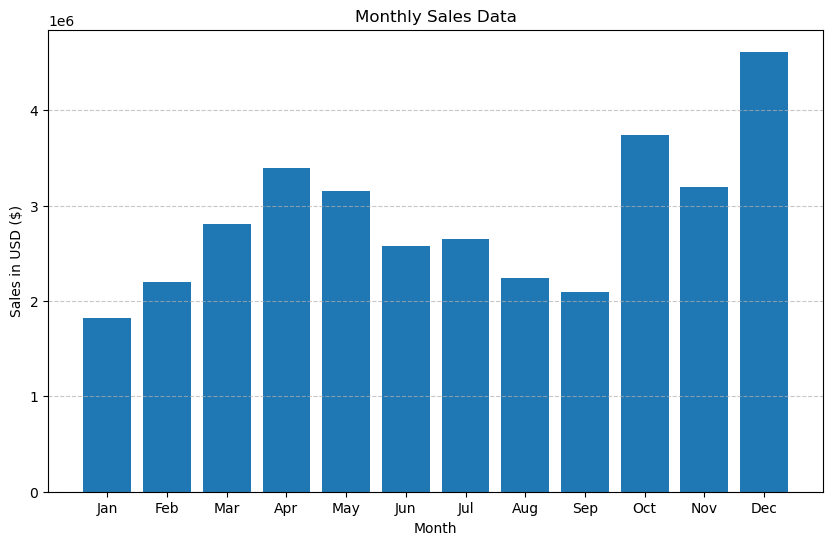

In [30]:
results = all_data.groupby('Month').sum(numeric_only=True)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))

# Creating a bar chart
plt.bar(months, results['Sales'])
plt.title('Monthly Sales Data')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<div style="background-color: #FAF9F6; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Insights
    
Sales data shows that December has the highest sales due to Christmas, while January has the lowest sales post-holidays. This reflects common consumer behavior: spending peaks during holidays and drops afterward as people save money. Recognizing these patterns helps adjust marketing and operations. Promotions during peak seasons can boost sales, while maintaining customer engagement after holidays can prevent a sales slump.


</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Sales by City

</div>

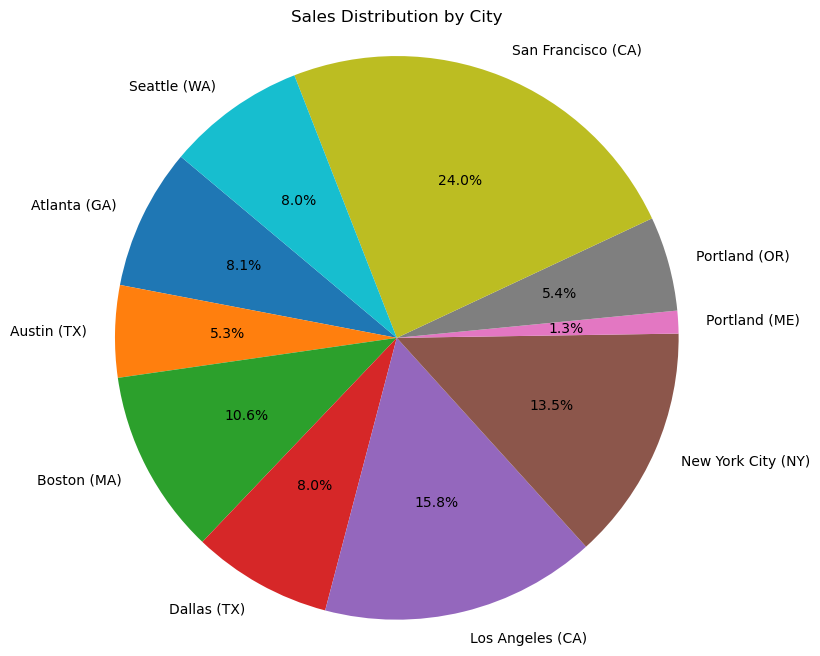

In [33]:
results = all_data.groupby('City').sum(numeric_only=True)
# City data
City = results.index

# Sales data
sales = results['Sales']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales, labels=City, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by City')
plt.axis('equal') 
plt.show()

<div style="background-color: #FAF9F6; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Insights
    
In sales distribution, San Francisco, CA, leads with the highest sales, while Portland, ME, has the lowest. Los Angeles, CA, and New York, NY, contribute significantly. This suggests that urban areas like Los Angeles and New York drive more sales compared to smaller cities like Portland. Understanding this helps focus resources and marketing efforts where sales potential is highest, maximizing overall revenue.

</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Sales by Hour

</div>

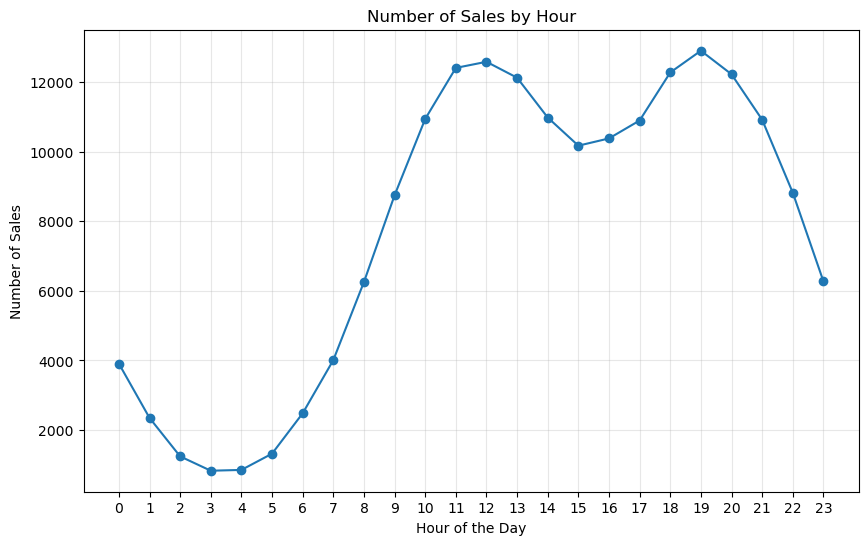

In [34]:
hours = [hour for hour, df in all_data.groupby('Hour')]
counts = all_data.groupby(['Hour']).count()

plt.figure(figsize=(10, 6))
plt.plot(hours, counts['Order ID'], marker='o', linestyle='-')
plt.title('Number of Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.grid(alpha=0.3)
plt.xticks(hours)
plt.show()

<div style="background-color: #FAF9F6; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Insights
    
Sales increase at 11 am and 7 pm but are lowest in the early morning and late night hours. This pattern suggests that customers are more active during mid-morning and early evening, likely aligning with typical shopping habits or commuting schedules. Adjusting staffing or promotional efforts to match these peak times can optimize sales performance.

</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Product Bundling

</div>

In [37]:
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for (product1, product2), freq in count.most_common(10):
    print(f"{product1} and {product2}: {freq} times")

iPhone and Lightning Charging Cable: 1005 times
Google Phone and USB-C Charging Cable: 987 times
iPhone and Wired Headphones: 447 times
Google Phone and Wired Headphones: 414 times
Vareebadd Phone and USB-C Charging Cable: 361 times
iPhone and Apple Airpods Headphones: 360 times
Google Phone and Bose SoundSport Headphones: 220 times
USB-C Charging Cable and Wired Headphones: 160 times
Vareebadd Phone and Wired Headphones: 143 times
Lightning Charging Cable and Wired Headphones: 92 times


<div style="background-color: #f0f8ff; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Product Analysis

</div>

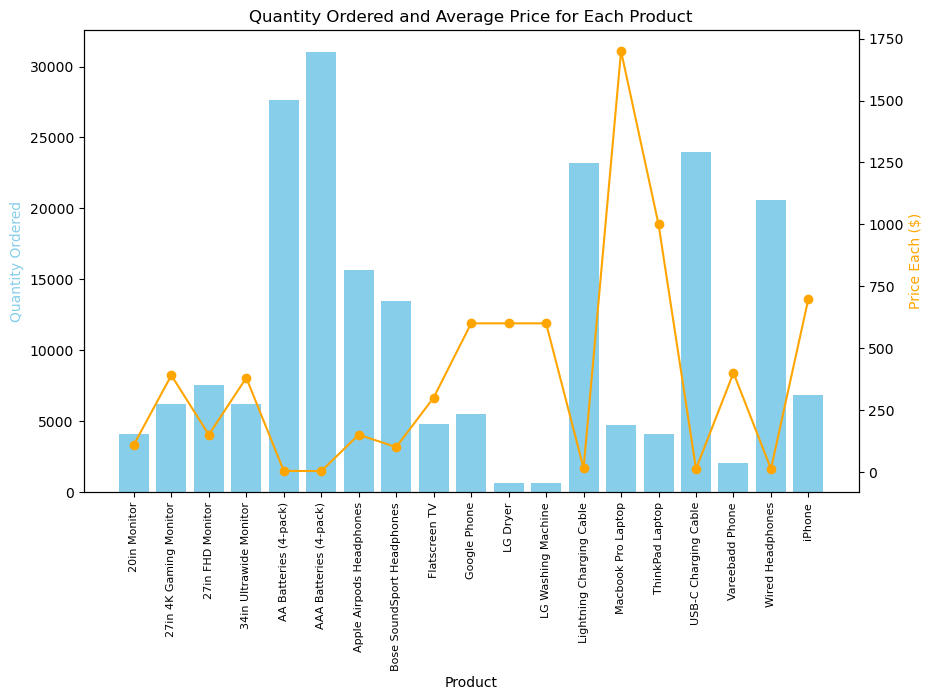

In [39]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']
prices = product_group.mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

products = [product for product, df in product_group]

ax1.bar(products, quantity_ordered, color='skyblue')
ax2.plot(products, prices, color='orange', marker='o')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='skyblue')
ax2.set_ylabel('Price Each ($)', color='orange')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.title('Quantity Ordered and Average Price for Each Product')
plt.show()

<div style="background-color: #FAF9F6; padding: 20px; border-radius: 10px; font-family: Arial, sans-serif;text-align: justify;">

### Insights
   The chart demonstrates a clear relationship between product quantity ordered and average price. Low-priced items like "AAA Batteries (4-pack)" and "AA Batteries (4-pack)" show high quantities ordered, indicating their necessity and frequent purchase. In contrast, high-priced items such as the "Macbook Pro Laptop" and "LG Washing Machine" have lower quantities ordered, reflecting selective and less frequent purchasing behavior. Mid-range products like the "27in FHD Monitor" and "Apple Airpods Headphones" exhibit steady demand. Notably, the "Lightning Charging Cable" stands out with a high quantity ordered despite a lower price, suggesting a very high demand for this accessory. To optimize sales, businesses should maintain high stock levels for frequently purchased low-priced items, offer targeted promotions for high-value items during peak sales times, and focus marketing efforts on mid-range products to boost demand. Aligning marketing campaigns and stock levels with peak sales periods (mid-morning and early evening) can further enhance sales performance. 

</div>